In [115]:
import matplotlib.pyplot as plt
import math

#wir kriegen die daten als p(phi) mit phi als Winkel der Kurbelwelle
#und zwar als tabelle.

#der worflow wird sein, 
#daten einlesen
#phis in Volumen umrechnen
#p/V diagram zeichnen,
#fläche integrieren
#??? Arbeit in Pme umrechnen
#Pme / Umin**-1 diagramm zeichnen

#aus [...]_b_[...].xlsx , weil da die 1500 u/min waren.
Drehmomente=[31.3,
             61.1,
             94.1,
             124.3,
             155.6,
             188.2,
             219.6,
             251.1,
             282.0,
             308.2,
            ]
#wir brauchen die Tabellen für

#V ist gegeben als
#V=A_Querschnitt*(Hub(phi)+Resthöhe)

A=5 #querschnittsfläche
Bohrung=0.081#m
A=math.pi*(Bohrung/2)**2 # m
print("querfläche",A)
Hubmax=0.0955#m

Vmax=A*Hubmax 


querfläche 0.005152997350050658


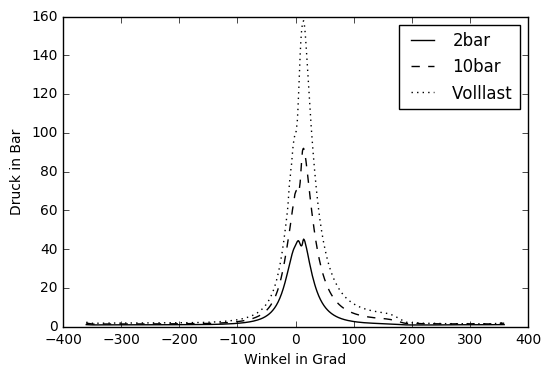

In [116]:
def convert_phi_to_rad(phi):
    
    rad=(phi/360)*math.pi*2
    return rad

def get_phis_ps(fn="2bar.csv"):

    phis=[]
    ps=[]
    winkel=[]
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            winkel.append(float(line[0]))
            ps.append(float(line[1])) #ps in bar
    return phis,winkel,ps

druckwinkel=[get_phis_ps("2bar.csv"),
             get_phis_ps("10bar.csv"),
             get_phis_ps("volllast.csv")]
c=0
pair=druckwinkel[0]
plt.plot(pair[1],pair[2],color="black",label="2bar")
pair=druckwinkel[1]
plt.plot(pair[1],pair[2],color="black",linestyle="--",label="10bar")
pair=druckwinkel[2]
plt.plot(pair[1],pair[2],color="black",linestyle=":",label="Volllast")
plt.xlabel("Winkel in Grad")
plt.ylabel("Druck in Bar")
plt.legend()
plt.savefig("DruckWinkel.jpg")
plt.show()
plt.clf()

vmax 0.4921112469298378


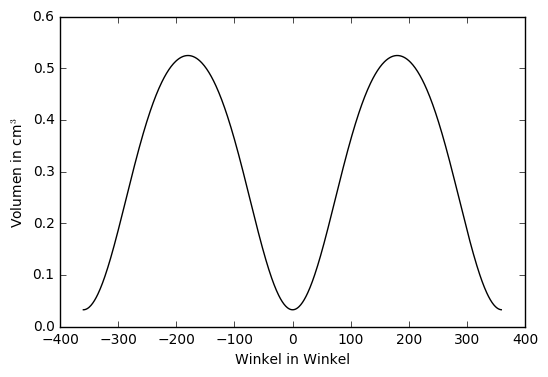

In [117]:


l=144*10**(-3)#in m pleuellänge
r = Hubmax/2#(Vmax / A*2)
lambda_s=r/l
#print(r,l,(Vmax / A*2),lambda_s)
def Hub(phi):
    #some function
    #fürs erste sollte der Sinus reichen   
    
    #dummy funktion
    #h=(Komph+1/2*Hubmax+Hubmax*math.sin(phi+3/2*math.pi))
    h = r * ( (1-math.cos(phi)) + 1/lambda_s * ( 1- (1-lambda_s**2 * math.sin(phi)**2)**0.5 ) ) 
    #jetzt richtig
    #
    #h+= Komph
    
    return h


#print(phis[0],phis[100],phis[300],phis[700])

Vs=[]
pair=druckwinkel[0]
    
phis,winkel,ps=pair
c=0
m=len(phis)
while c < m:
    phi=phis[c]
    w=winkel[c]
    #print(Hub(phi))
    V=A*Hub(phi)*1000 #ccm 
    #jetzt nur nohc hubraum
    V_t=V
    Vs.append(V_t)
    c+=1
    
newvs=[]
V_max=max(Vs)
print("vmax",V_max,)
for v in Vs:
    newvs.append(v+V_max/15.2)
Vs=newvs
#print(Hub(phi))
#print(A)
plt.plot(winkel,Vs,color="black")
plt.xlabel("Winkel in Winkel")
plt.ylabel("Volumen in cm${^3}$")
plt.savefig("VolumenWinkel.jpg")
plt.show()

plt.clf()

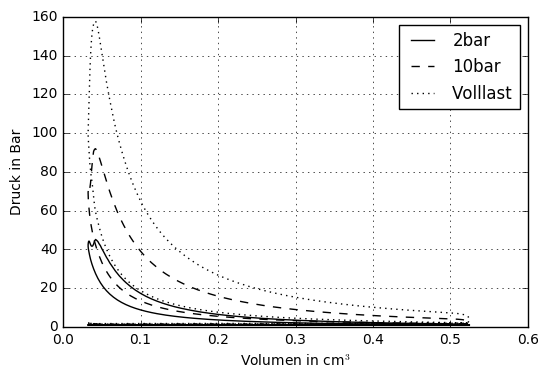

In [118]:
#print(Vs[0:100])
#Aufpassen, ich brauche entweder nur einen Ladungswechsel, oder ich muss mitteln
#unabhängig davon, habe ich
#jetzt alle Werte für p und V
#und man kann das p V diagram plotten

#dummy werte
#Vs=[4,2,2,4,1,3,4]
#ps=[2,2,1,1,8,8,2]

#plt.xlim(0.0002,0.0008)
fig, ax = plt.subplots()
Vsccm=[]
for v in Vs:
    Vsccm.append(v)
ax.grid(True)
plt.plot(Vsccm,druckwinkel[0][2],color="black",label="2bar")
plt.plot(Vsccm,druckwinkel[1][2],color="black",linestyle="--",label="10bar")
plt.plot(Vsccm,druckwinkel[2][2],color="black",linestyle=":",label="Volllast")

plt.xlabel("Volumen in cm${^3}$")
plt.ylabel("Druck in Bar")
plt.legend()
plt.savefig("PV.jpg")
plt.show()

plt.clf()



In [125]:

#numerische Flächeberechnung nach Cha Zhang
#EFFICIENT FEATURE EXTRACTION FOR 2D/3D OBJECTS
#IN MESH REPRESENTATION
def Teilfläche(p1,p2):
    A = 1/2 * ( - p2[0] * p1[1] + p1[0] * p2[1] )
    return A


A=0
c=180
m=180+360
bartopascal=10**5
btp=bartopascal
print(m)

while c < m-1:
    p1=(ps[c]*btp,Vs[c])
    p2=(ps[c+1]*btp,Vs[c+1])
    Teil_A=Teilfläche(p1,p2)
    #control printout
    #print("parts",p1,p2,Teil_A)
    A+=Teil_A
    c+=1
    
#p0=(ps[0],Vs[0])
#pl=(ps[-1],Vs[-1])
#ai=Teilfläche(pl,p0)
#print(ai)
#A+=ai
print("Ergebnis, Arbeit bzw. eingeschlossene Fläche:",A/1000)# ccm->m3

#gesamt_motor=A*2*(1500/60)/1000#pro sekunde in KW
#print(gesamt_motor)#pro spiel

#print(1500*A*2/1000)
#Wir haben jetzt also die Arbeit, in Nm, für einen Lastwechsel,



540
Ergebnis, Arbeit bzw. eingeschlossene Fläche: 174.88399839236303


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
9 9
8 9


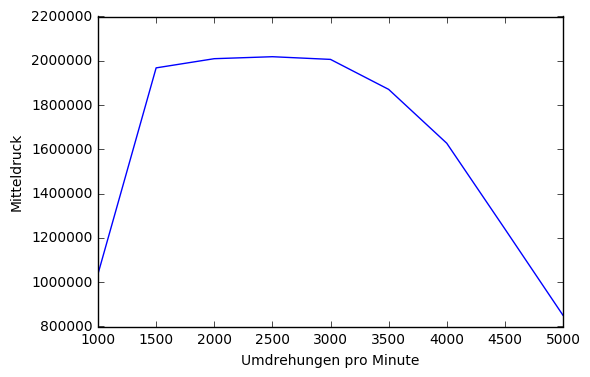

In [120]:
#Als nächsten Schritt, zur Berechnung des Motorkennfelds
#brauchen wir den Mitteldruck...

#ähm...


#b_e=massenstrom/leistung
letters="a b c d e f g h i"
letters=letters.split(" ")
print(letters)

fn="All_i.csv"


#öffnet alle Dateien mit den Buchstaben, die haben jeweils eine Drehzahl...l
#die Kurve oben die als Maske verwendet wird ist die Volllastleistung

P_mes_voll=[]
P_mes=[]
all_us=[]
b_es=[]
Us=[]
for letter in letters:
    fn="All_"+letter+".csv"
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        b_es.append([])
        P_mes.append([])
        Us.append([])
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            m_dot=float(line[49])*1000
            P=float(line[6])
            b_e=m_dot/P
            b_es[-1].append(b_e)
            #print(m_dot,P)
            
            drehmoment=float(line[5])
            V=1968*10**(-6)
            P_me=drehmoment*4*math.pi/V
            P_mes[-1].append(P_me)
            
            Us[-1].append(int(line[4]))
            
            
            #phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            #winkel.append(float(line[0]))
            #ps.append(float(line[1])) #ps in bar
        all_us.append(int(line[4]))
        drehmoment=float(line[5])
        V=1968*10**(-6)
        P_me=drehmoment*4*math.pi/V
        P_mes_voll.append(P_me)
        
print(len(Us),len(P_mes))

c=0
m=len(Us)
while c < m:
    #print(Us[c],P_mes[c])
    c+=1
    
print(len(Us[0]),len(P_mes_voll))
plt.plot(all_us,P_mes_voll)
                  
plt.xlabel("Umdrehungen pro Minute")
plt.ylabel("Mitteldruck")

#plt.legend()

plt.show()
plt.clf()


In [121]:

X=Us[0:2]
Y=P_mes[0:2]
Z=b_es[0:2]

print(X)
print(Y)
print(Z)



levels=2
plt.contourf(X,Y,Z,levels,cmap="Oranges")
plt.show()

[[1500, 1500, 1000, 1000, 1000, 1000, 1000, 1000], [1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500]]
[[-178151.29072186025, 201138.55404080998, 197945.87857984472, 403554.17826600606, 595114.7059239203, 798168.8652413093, 995476.2087289611, 1037619.5248137021], [199861.48385642387, 390144.941329952, 600861.5217536577, 793699.119595958, 993560.6034523818, 1201723.0435073155, 1402223.0624559321, 1603361.616496742, 1800668.9599843938, 1967965.1541389723]]
[[-0.0, 285.71428571428567, 312.5, 257.57575757575756, 244.89795918367346, 236.6412213740458, 233.12883435582822, 241.1764705882353], [306.1224489795918, 250.0, 216.2162162162162, 220.51282051282053, 217.21311475409837, 212.83783783783784, 211.59420289855072, -1413.7055837563453, 212.18961625282168, 212.8099173553719]]


ValueError: setting an array element with a sequence.

In [ ]:

#wir haben:

#M.KR in 2014_02_12_buchstabe
Mkr=1
#spalte AX

# kraftstoffverbrauch pro stunde
# Energie pro zylinder auf 2 umdrehungen
def spez_Kraftstoff(A,Mkr):
    A_neu=A/2*4*1500/60
    # Energie pro umdrehung für alle zylinder mal umdrehungen pro min / 60 s
    # das ist die energie pro sekunde die wir gewinnen


    Mkr_neu= Mkr / 3600 # kraftverbrauch pro sekunde

    spez_KR = Mkr_neu/A_neu 
    return spez_KR

# gesucht: spezifischer Kraftstoffverbrauch in g/kWh

x=spez_Kraftstoff(A,Mkr)
print(x)

#also meines Us sind die xs
#die pszs sind die Verbrauchszahlen bei einer umdrehungszahl
xs=Us
ys=
levels=8
plt.contourf(xs,ys,psz,levels,cmap="Oranges")
plt.show()

In [123]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xs=[0,1,2,3,4,5,6]



ys=[0,1,2,3,4,5,6]

#psx=[]
#psy=[]
psz=[] #ugh wtf?!
for x in xs:
    psz.append([])
    for y in ys:
        
        psz[-1].append((x-3)**2+(y-3)**2)


#it's a mix of data + programming
# z is a matrix of f(x,y) as looped through here.

X=[[0,1,2],
   [0,1,2],
   [0,1]]
    
Y=[[0,0,0],
 [1,0.5,1],
  [2,2]]

Z=[[0,0,0],
  [0,1,0],
   [0,0]]

levels=2
plt.contourf(X,Y,Z,levels,cmap="Oranges")
plt.show()


ValueError: setting an array element with a sequence.

In [ ]:
#Wirkungsgrade siehe folien mit formeln
#leistung gegebene / gemessen
#brennwerte der gram massenstrom
